## Marciniak, Duncan, and Hu (2002): _Mechanics of Sheet Metal Forming_.
### Exercise 2.1.

A square element 8 × 8 mm in an undeformed sheet of 0.8 mm thickness becomes
a rectangle, 6.5 × 9.4 mm after forming. Assume that the stress strain law is:

$\overline\sigma = 600 (0.008 + \overline\varepsilon)^{0.22}$ (MPa)

and that the stress normal to the sheet is zero. Determine:

(a) the final membrane stresses;

(b) the final thickness;

(c) the principal strains.

Sketch these in the stress or strain space.

Also determine:

(d) the stress and strain ratios (assumed constant) and the hydrostatic stress and the
deviatoric stresses at the end of the process, and

(e) the plastic work of deformation in the element.

### Solutions

In [1]:
import math
t0 = 0.8
l0 = 8
w0 = 8
l = 9.4
w = 6.5
seff = lambda eeff: 600*(0.008 + eeff)**0.22

#### Strains

$$ \varepsilon_1 = \ln\frac{9.4}{8} \qquad , \qquad \varepsilon_2 = \ln\frac{6.5}{8} \qquad , \qquad \varepsilon_3 = -(\varepsilon_1+\varepsilon_2) $$

$$\beta = \frac{\varepsilon_2}{\varepsilon_1} $$

$$ \overline\varepsilon = \varepsilon_1 \frac{2}{\sqrt{3}} \sqrt{1+\beta+\beta^2} $$

e1 = 0.161, e2 = -0.208, e3 = 0.046
beta = -1.29
e = 0.218


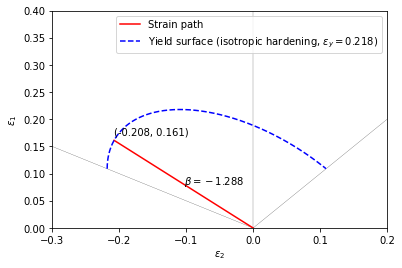

In [2]:
e1 = math.log(l/l0)
e2 = math.log(w/w0)
e3 = -(e1+e2)
beta = e2/e1
e = e1*2/math.sqrt(3)*math.sqrt(1+beta+beta**2)
print("e1 = %.3f, e2 = %.3f, e3 = %.3f" % (e1, e2, e3))
print("beta = %.2f" % beta)
print("e = %.3f" % e)

from marciniak_ex2_1 import *
plot_strains(e1, e2)

#### Stresses

$$ \overline\sigma = 600 (0.008 + \overline\varepsilon)^{0.22} $$

$$ \alpha = \frac{2\beta+1}{2+\beta} $$ 

$$ \sigma_1 = \frac{\overline\sigma}{\sqrt{1-\alpha+\alpha^2}} \qquad , \qquad \sigma_2=\alpha\sigma_1 \qquad , \qquad \sigma_3 = 0 $$


s = 432.6 MPa
alpha = -2.21
s1 = 152.0 MPa, s2 = -336.0 MPa, s3 = 0.0 MPa


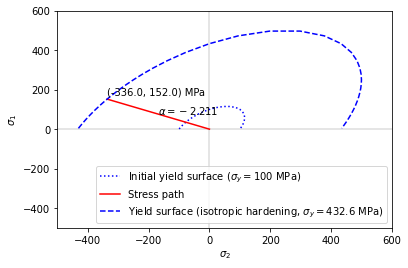

In [3]:
s = seff(e)
alpha = (2*beta+1)/(2+beta)
s1 = s/math.sqrt(1-alpha+alpha**2)
s2 = alpha*s1
s3 = 0
print("s = %.1f MPa" % s)
print("alpha = %.2f" % alpha)
print("s1 = %.1f MPa, s2 = %.1f MPa, s3 = %.1f MPa" % (s1, s2, s3))

plot_stresses(s1, s2)

#### Final thickness

$$ t = t_0 \exp(\varepsilon_3) $$

In [4]:
t = t0*math.exp(e3)
print("t = %.3f mm" % t)

t = 0.838 mm


#### Hydrostatic stress and deviatoric stresses

$$ \sigma_h = \frac{\sigma_1+\sigma_2+\sigma_3}{3}  $$

$$ \sigma'_i = \sigma_i - \sigma_h \qquad , \qquad i = {1, 2, 3} $$ 

In [5]:
sh = (s1+s2+s3)/3
ds1 = s1 - sh
ds2 = s2 - sh
ds3 = s3 - sh
print("sh = %.1f MPa, ds1 = %.1f MPa, ds2 = %.1f MPa, ds3 = %.1f MPa" % (sh, ds1, ds2, ds3))

sh = -61.3 MPa, ds1 = 213.3 MPa, ds2 = -274.7 MPa, ds3 = 61.3 MPa


#### Plastic work

Density of plastic work:

$$ w = \int_0^{\overline\varepsilon} \overline\sigma d\overline\varepsilon =
600 \int_0^{\overline\varepsilon} (0.008 + \overline\varepsilon)^{0.22} d\overline\varepsilon \cdot \frac{1}{1000} = 
600 \left[ \frac{(0.008 + \overline\varepsilon)^{1.22}}{1.22} \right]_0^\overline\varepsilon \cdot \frac{1}{1000} $$

where the units are MPa/1000 = N/mm$^2$/1000 = J/mm$^3$.

Plastic work (in J):
$$ W = w \cdot V = w \cdot 0.8 \cdot 8 \cdot 8  $$
where $V$ is the material volumen in mm$^3$.

In [6]:
pw = 600/1.22*((0.008+e)**1.22 - 0.008**1.22)
pw = pw/1000 # in J/mm3
V = l0*w0*t0
PW = pw*V
print("pw = %.4f J/mm3, V= %.1f mm3, PW = %.2f J" % (pw, V, PW))

pw = 0.0788 J/mm3, V= 51.2 mm3, PW = 4.03 J


In [7]:
# or using the function scipy.integrate.quad to compute a definite integral

from scipy.integrate import quad
import numpy as np
pw, err = quad(seff, 0, e)
pw = pw/1000
PW = pw*V
print("pw = %.4f J/mm3, PW = %.2f J" % (pw, PW))

pw = 0.0788 J/mm3, PW = 4.03 J
